
# Install and Load Libraries


In [137]:
!pip install kaggle kagglehub

In [138]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Data Extraction

In [139]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [140]:
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/adult-income-dataset


In [141]:
df = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# PreProcessing

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [143]:



df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

df['capital-gain'] = df['capital-gain'].astype(np.uint32)
df['capital-loss'] = df['capital-loss'].astype(np.uint32)
df['hours-per-week'] = df['hours-per-week'].astype(np.uint16)


In [144]:

df.dropna(subset=['age', 'gender', 'income'], inplace=True)

df['age'] = df['age'].astype(np.uint8)
df['gender'] = df['gender'].astype(np.uint8)
df['income'] = df['income'].astype(np.uint8)

In [145]:
print(df[['education', 'educational-num']].drop_duplicates().sort_values(by='educational-num'))

df.drop('education', axis=1, inplace=True)

df.rename(columns={'educational-num': 'education_level'}, inplace=True)

        education  educational-num
779     Preschool                1
323       1st-4th                2
37        5th-6th                3
9         7th-8th                4
54            9th                5
5            10th                6
0            11th                7
173          12th                8
1         HS-grad                9
3    Some-college               10
41      Assoc-voc               11
2      Assoc-acdm               12
11      Bachelors               13
15        Masters               14
7     Prof-school               15
19      Doctorate               16


In [146]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  uint8 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education_level  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  uint8 
 9   capital-gain     48842 non-null  uint32
 10  capital-loss     48842 non-null  uint32
 11  hours-per-week   48842 non-null  uint16
 12  native-country   48842 non-null  object
 13  income           48842 non-null  uint8 
dtypes: int64(2), object(6), uint16(1), uint32(2), uint8(3)
memory usage: 3.6+ MB


In [147]:
df

,age,workclass,fnlwgt,education_level,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,?,103497,10,Never-married,?,Own-child,White,1,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


# person income Processing




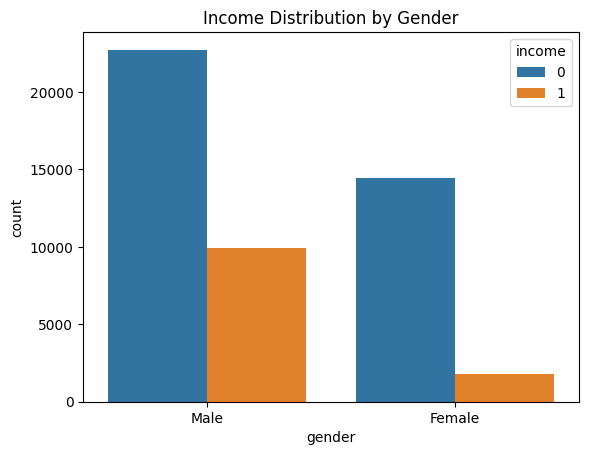

In [148]:
sns.countplot(x='gender', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

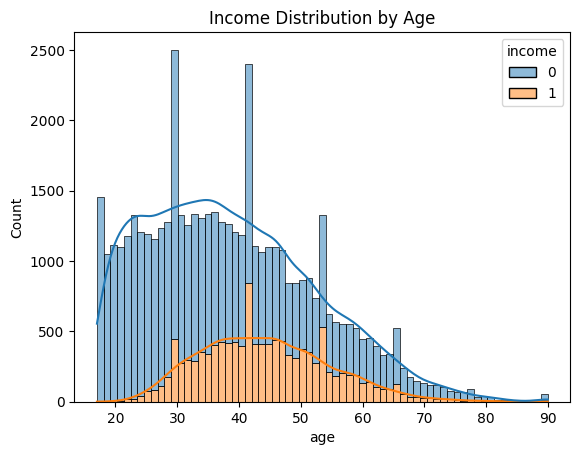

In [149]:
sns.histplot(data=df, x='age', hue='income', multiple="stack", kde=True)
plt.title('Income Distribution by Age')
plt.show()

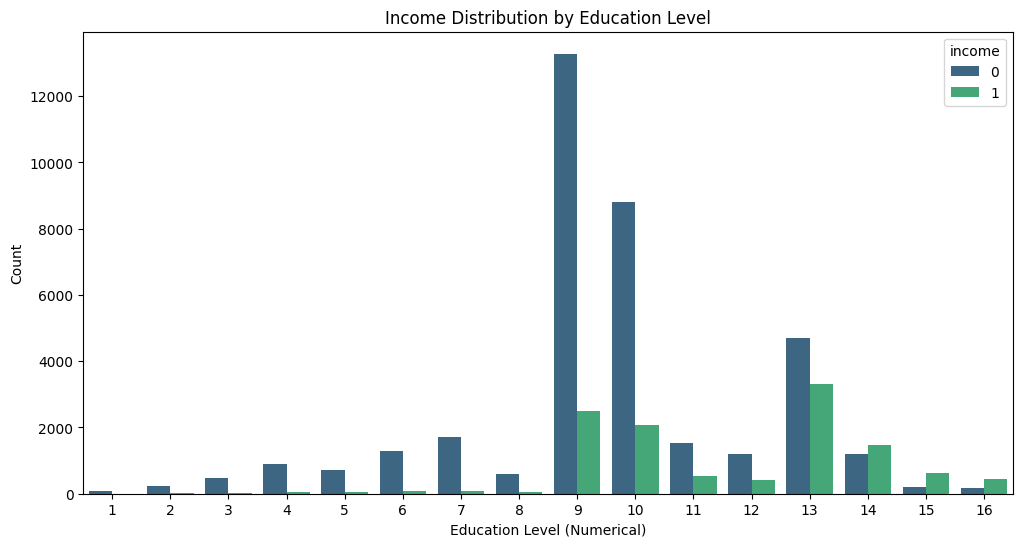

In [150]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='income', data=df, palette='viridis')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level (Numerical)')
plt.ylabel('Count')
plt.show()


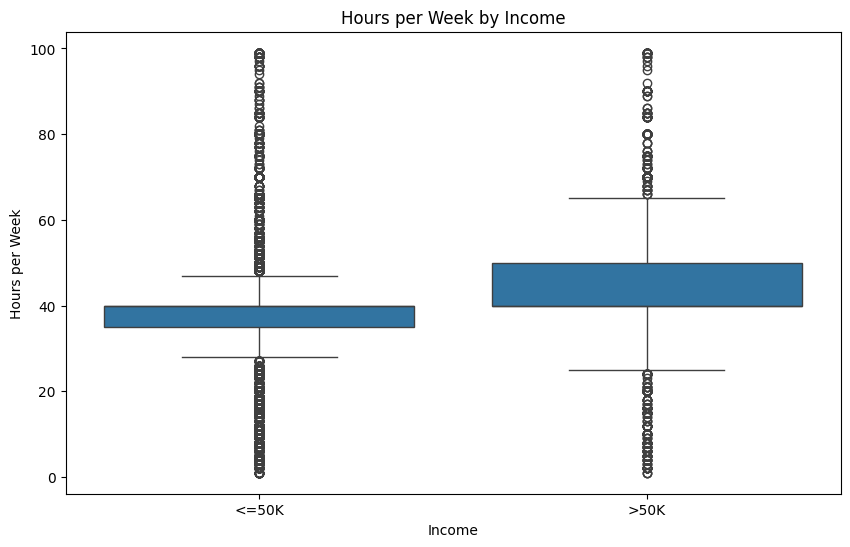

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week by Income')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

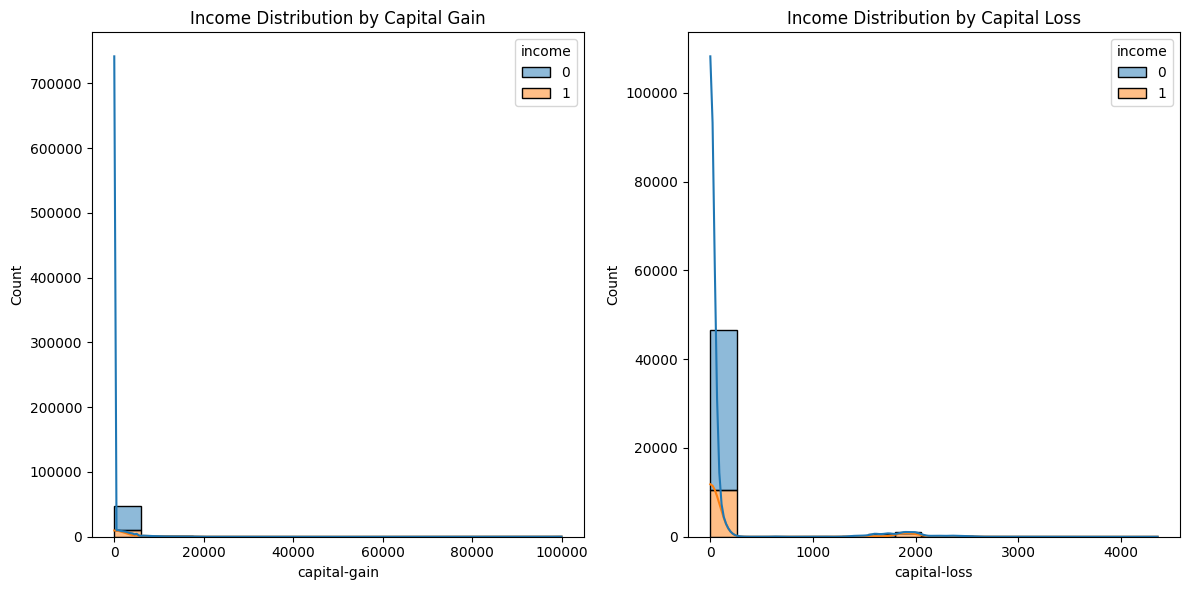

In [152]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='capital-gain', hue='income', multiple="stack", kde=True)
plt.title('Income Distribution by Capital Gain')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='capital-loss', hue='income', multiple="stack", kde=True)
plt.title('Income Distribution by Capital Loss')

plt.tight_layout()
plt.show()

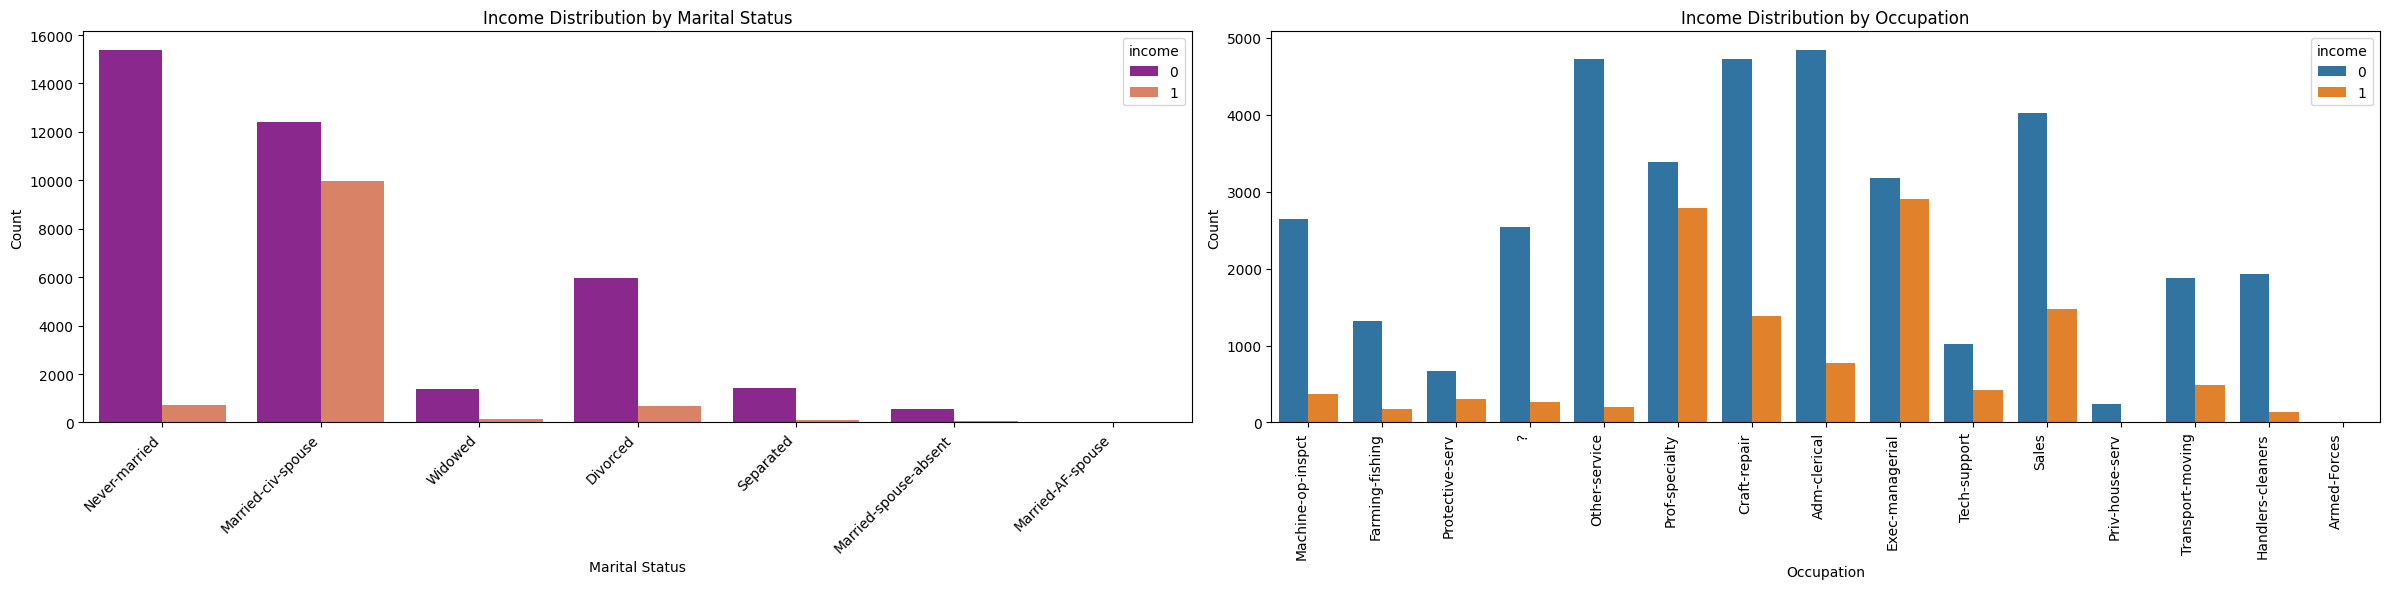

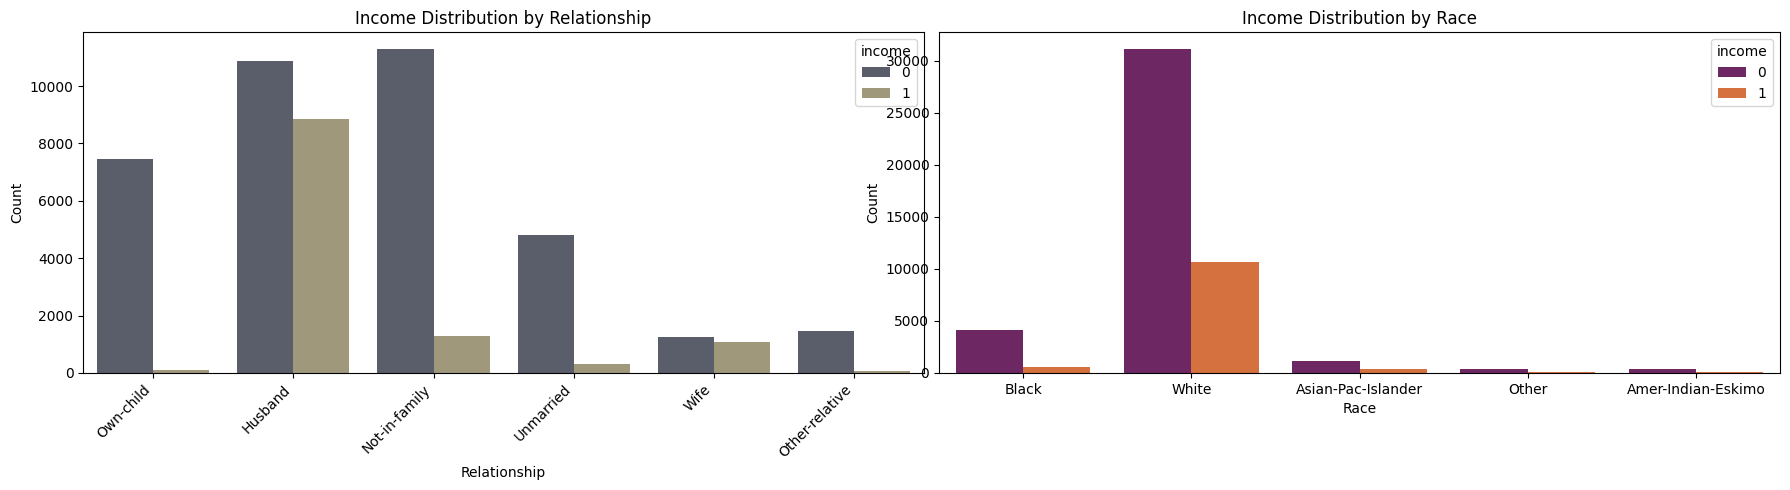

Too many unique values in 'native-country' for a clear bar plot. Consider grouping or focusing on specific countries.


In [153]:
if 'marital-status' in df.columns and 'occupation' in df.columns:
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.countplot(x='marital-status', hue='income', data=df, palette='plasma')
    plt.title('Income Distribution by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.countplot(x='occupation', hue='income', data=df, palette='tab10')
    plt.title('Income Distribution by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

    plt.show()
elif 'marital-status' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='marital-status', hue='income', data=df, palette='plasma')
    plt.title('Income Distribution by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
elif 'occupation' in df.columns:
    plt.figure(figsize=(14, 7))
    sns.countplot(x='occupation', hue='income', data=df, palette='tab10')
    plt.title('Income Distribution by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

if 'relationship' in df.columns and 'race' in df.columns:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.countplot(x='relationship', hue='income', data=df, palette='cividis')
    plt.title('Income Distribution by Relationship')
    plt.xlabel('Relationship')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.countplot(x='race', hue='income', data=df, palette='inferno')
    plt.title('Income Distribution by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.show()
elif 'relationship' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='relationship', hue='income', data=df, palette='cividis')
    plt.title('Income Distribution by Relationship')
    plt.xlabel('Relationship')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
elif 'race' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='race', hue='income', data=df, palette='inferno')
    plt.title('Income Distribution by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.show()

if 'native-country' in df.columns and df['native-country'].nunique() < 30:
    plt.figure(figsize=(16, 7))
    sns.countplot(x='native-country', hue='income', data=df, palette='viridis')
    plt.title('Income Distribution by Native Country')
    plt.xlabel('Native Country')
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
elif 'native-country' in df.columns:
    print("Too many unique values in 'native-country' for a clear bar plot. Consider grouping or focusing on specific countries.")

In [154]:
# نمودارها نشان می‌ دهند که مردان، افراد میانسال، و کسانی با تحصیلات دانشگاهی احتمال بیشتری برای درآمد بالای ۵۰ هزار دلار دارند.
#  ساعات کاری بیشتر و سود سرمایه‌ ای نیز با درآمد بالاتر مرتبط‌ اند.
# افراد متأهل و شاغل در برخی مشاغل خاص بیشتر در گروه درآمد بالا قرار دارند.
# همچنین نژاد و کشور محل تولد نیز بر سطح درآمد تأثیرگذارند.

# Best income Processing

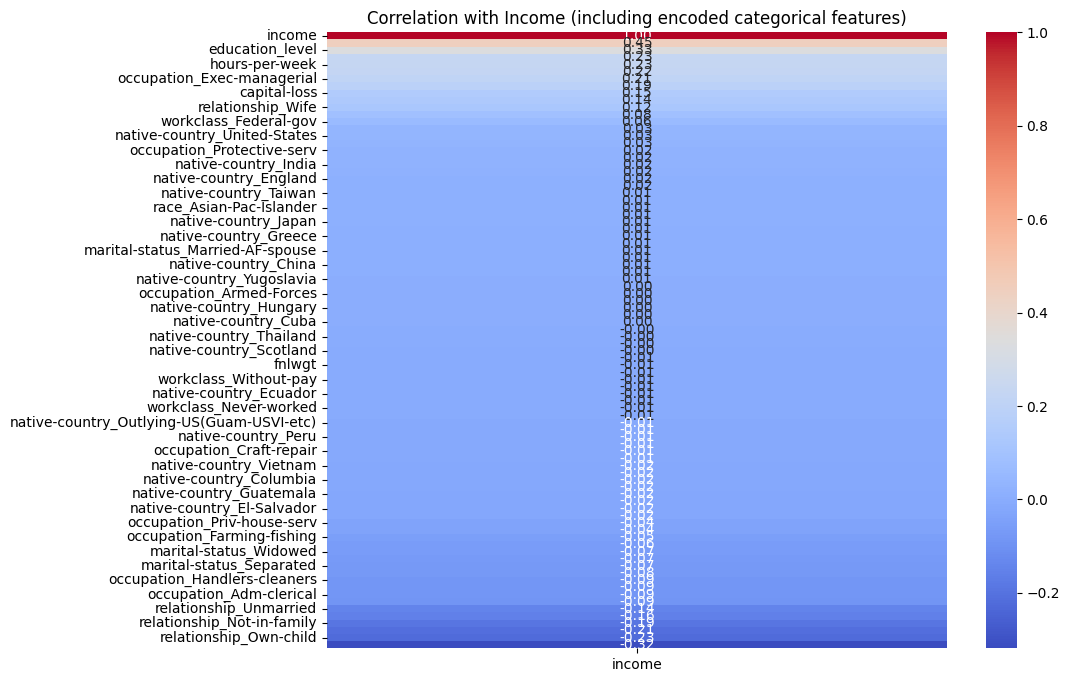

In [155]:

categorical_cols_for_corr = df.select_dtypes(include='object').columns.tolist()

if 'income' in categorical_cols_for_corr and pd.api.types.is_numeric_dtype(df['income']):
    categorical_cols_for_corr.remove('income')


df_encoded = pd.get_dummies(df, columns=categorical_cols_for_corr, drop_first=True)

plt.figure(figsize=(10, 8))


if 'income' in df_encoded.columns:
    correlation_matrix = df_encoded.corr()
    income_correlation = correlation_matrix[['income']].sort_values(by='income', ascending=False)

    sns.heatmap(income_correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation with Income (including encoded categorical features)')
    plt.show()
else:
    print("Warning: 'income' column not found in the DataFrame after encoding. Cannot plot correlation with income.")

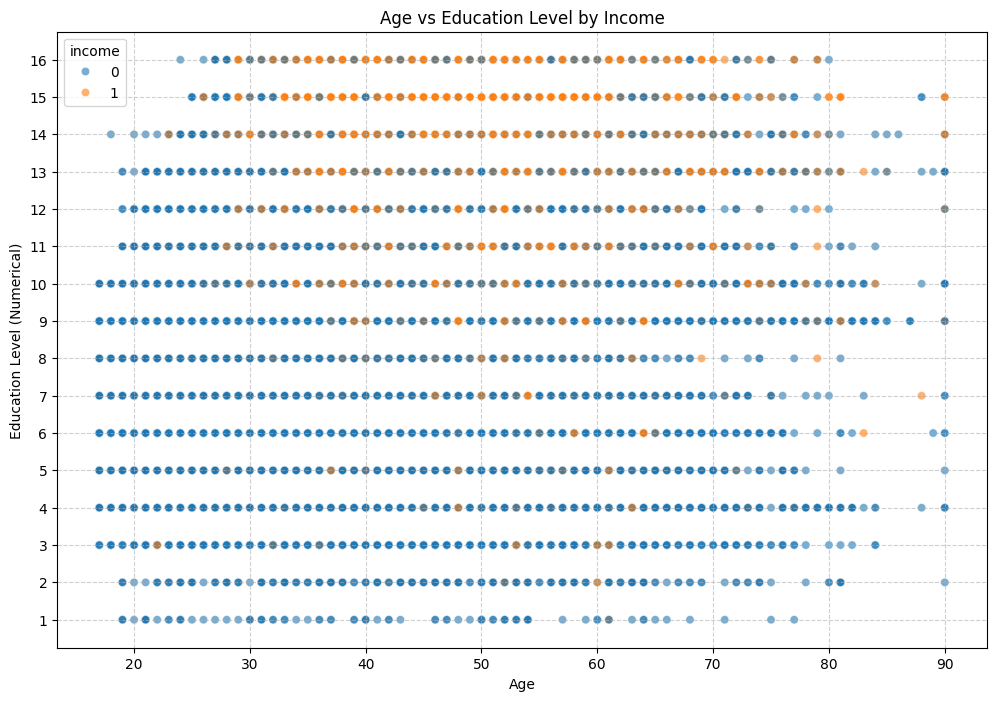

In [156]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='education_level', hue='income', alpha=0.6)
plt.title('Age vs Education Level by Income')
plt.xlabel('Age')
plt.ylabel('Education Level (Numerical)')
plt.yticks(ticks=range(1, df['education_level'].max() + 1)) # Set ticks for education levels
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

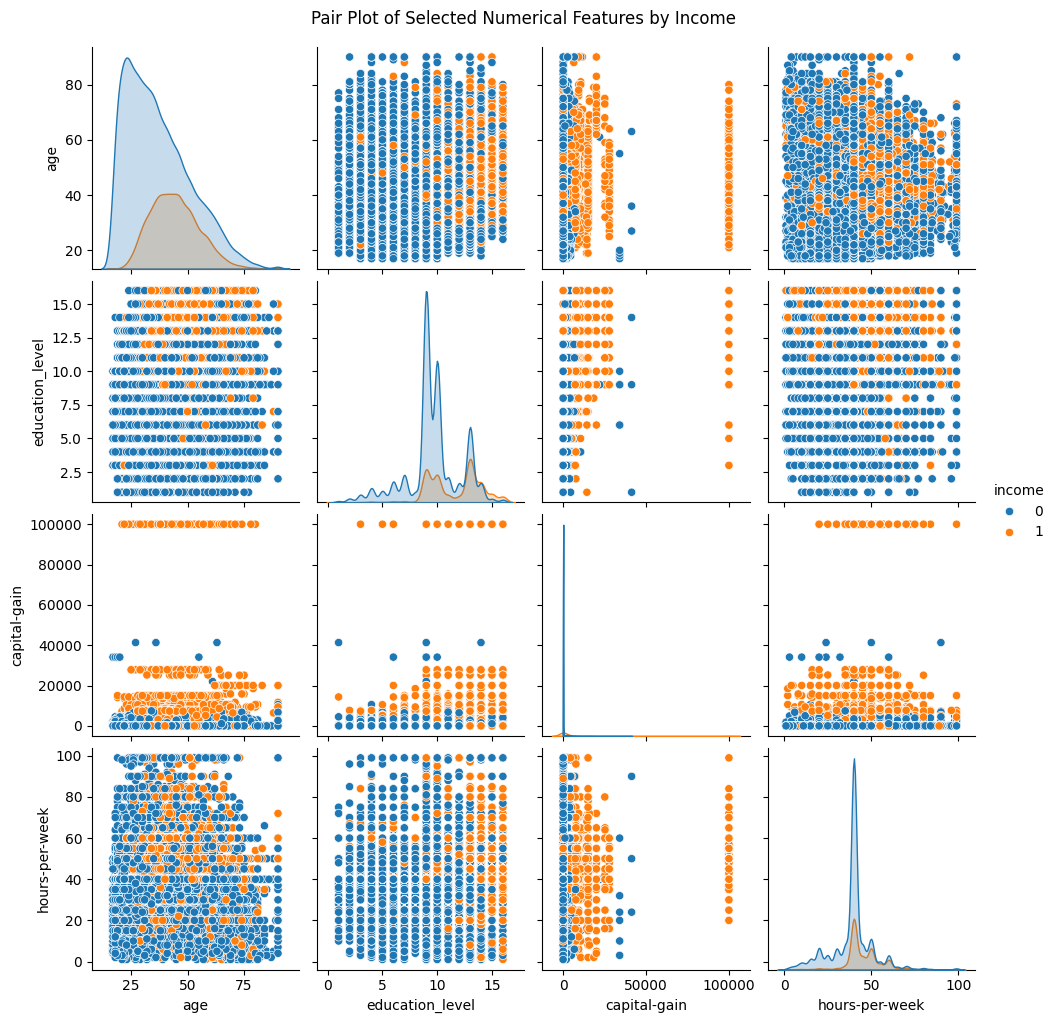

In [157]:
numerical_cols_for_pairplot = ['age', 'education_level', 'capital-gain', 'hours-per-week', 'income']
sns.pairplot(df[numerical_cols_for_pairplot], hue='income', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features by Income', y=1.02)
plt.show()

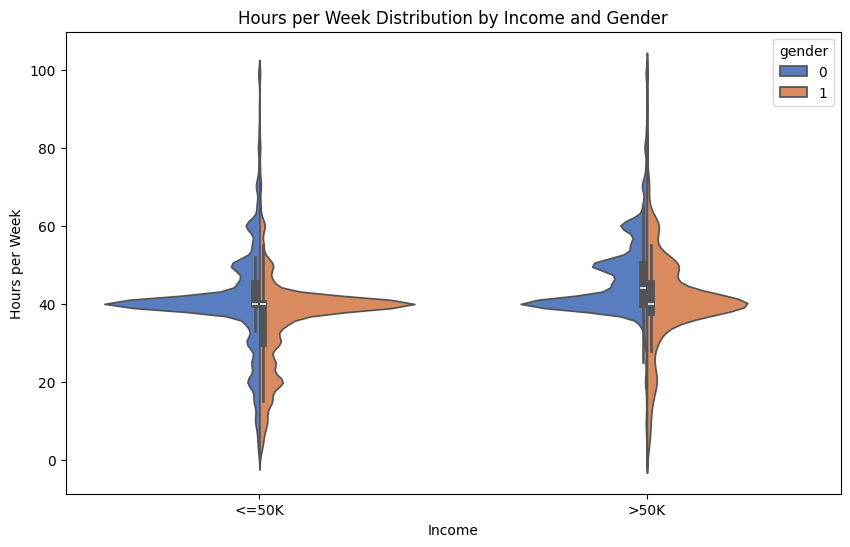

In [158]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours-per-week', hue='gender', data=df, split=True, palette='muted')
plt.title('Hours per Week Distribution by Income and Gender')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

In [159]:
# تحلیل‌ ها نشان می‌ دهد که ویژگی‌ هایی مانند سن، سطح تحصیلات، ساعات کاری و درآمد سرمایه‌ ای بیشترین همبستگی را با سطح درآمد دارند.
# نمودار همبستگی پس از رمزگذاری ویژگی‌ های متنی این وابستگی را به‌ خوبی نمایان کرده است. نمودار پراکندگی سن و تحصیلات نیز نشان می‌ دهد که افراد با تحصیلات بالاتر و سن متوسط تمایل بیشتری به درآمد بالاتر دارند.
# همچنین، نمودار ویولین نشان می‌ دهد که مردان در سطوح بالای درآمدی معمولاً ساعات بیشتری در هفته کار می‌ کنند.
